# Are there any factors except preperation time which could explain a higher SAT score?

In [61]:
import pandas as pd
import matplotlib as plt
import seaborn as sb
from matplotlib import pyplot as plt
import math

In [62]:
data = pd.read_csv("/kaggle/input/high-schools/scores.csv")

### x and y Variables:

* y-variable → Average SAT Scores(Math, Reading, Writing)
* x-variable 1 → Borough 
* x-variable 2 → Completion time
* x-variable 3 → Race of the individual

For the assignment, I am trying to figure out if and how the individual’s borough, the completion time of the test, and the individual’s race affect the Average SAT Score if they do. I believe they all have something to do with increasing the score, through this project, I am trying to understand whether this hypothesis is true or not and if it is, how it affects the score. For example, the borough may determine if you’re in a higher income bracket (this can be figured out due to the living expenses being different in different areas) and whether that means you have a better chance of getting a higher grade or whether the longer you take to complete the exam, the better the grade you get. In addition, the race of the individual vs average SAT scores for all three can tell us if a certain race is better at any of the sections compared to others. 

### Introduction:

The high school data was “compiled and published by the New York City Department of Education, and the SAT score averages and testing rates were provided by the College Board.” This data is being used in order to answer my research question: **"Are there any factors except preperation time which could explain a higher SAT score?"** This will be done by figuring out whether the individual’s borough, the completion time of the test, and the individual’s race affect the Average SAT Scores for Math, Reading, and Writing and if they do, how so? After getting an answer to the research question, I will be able to understand how the different x-variables will affect the score.

Through this project, I will be able to answer multile queries such as whether taking your time during a SAT test helps you score better as it reduces mistakes or should you try and go quick to finish everything. This analysis will be done through multiple statistical models with analysis under each.

After completing this assignment I will have a better understanding of whether there are any factors except preperation time that affect the average SAT score.

The entire dataset is displayed below:


In [63]:
data.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,...,3:00 PM,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%


### Data Cleaning/Loading:

The unique columns are displayed below:

In [64]:
data.count()

School ID                      435
School Name                    435
Borough                        435
Building Code                  435
Street Address                 435
City                           435
State                          435
Zip Code                       435
Latitude                       435
Longitude                      435
Phone Number                   435
Start Time                     431
End Time                       431
Student Enrollment             428
Percent White                  428
Percent Black                  428
Percent Hispanic               428
Percent Asian                  428
Average Score (SAT Math)       375
Average Score (SAT Reading)    375
Average Score (SAT Writing)    375
Percent Tested                 386
dtype: int64

As 'School ID', 'School Name', 'Building Code', 'Street Address', 'City', 'State', 'Zip Code', 'Latitude', 'Longitude', 'Percent Tested' are not required to answer the research question, I can remove these columns from my data. On top of that, I will remove any rows with null values as this will not give me a result and ultimately lead to a false conclusion.

Furthermore, I will add a column for Duration which will display the difference between the Start Time and End Time to show how long it takes the students to complete the SAT exam and coluoumns for the number of White, Asian, Hispanic and Black people are in the data.

The following figure displays the cleaned table without unnecessary columns and rows and added columns for duration, number of White people, Asian people, Hispanic people, and Black people. This data will help me answer the research question:

In [65]:
def calculate_student_count(df):
    df['Number of White'] = (df['Percent White'].astype(str).str.rstrip('%').astype(float) / 100 * df['Student Enrollment']).round().astype(int)
    df['Number of Black'] = (df['Percent Black'].astype(str).str.rstrip('%').astype(float) / 100 * df['Student Enrollment']).round().astype(int)
    df['Number of Hispanic'] = (df['Percent Hispanic'].astype(str).str.rstrip('%').astype(float) / 100 * df['Student Enrollment']).round().astype(int)
    df['Number of Asian'] = (df['Percent Asian'].astype(str).str.rstrip('%').astype(float) / 100 * df['Student Enrollment']).round().astype(int)
    
    return df
tempz = cleaned_data.reset_index()
tempz = calculate_student_count(tempz)
tempz['Duration'] = tempz.apply(get_duration, axis=1)
tempz

,index,Borough,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent White,Percent Black,Percent Hispanic,Percent Asian,Student Enrollment,Start Time,End Time,Number of White,Number of Black,Number of Hispanic,Number of Asian,Duration
0,2,Manhattan,657.0,601.0,601.0,28.6%,13.3%,18.0%,38.5%,1735.0,8:15 AM,4:00 PM,496,231,312,668,465
1,3,Manhattan,395.0,411.0,387.0,11.7%,38.5%,41.3%,5.9%,358.0,8:00 AM,2:45 PM,42,138,148,21,405
2,4,Manhattan,418.0,428.0,415.0,3.1%,28.2%,56.9%,8.6%,383.0,8:30 AM,3:00 PM,12,108,218,33,390
3,5,Manhattan,613.0,453.0,463.0,1.7%,3.1%,5.5%,88.9%,416.0,8:00 AM,3:35 PM,7,13,23,370,455
4,6,Manhattan,410.0,406.0,381.0,3.9%,24.4%,56.6%,13.2%,255.0,8:30 AM,3:30 PM,10,62,144,34,420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,430,Queens,372.0,362.0,352.0,2.1%,49.1%,43.6%,4.2%,381.0,7:45 AM,4:10 PM,8,187,166,16,505
370,431,Queens,357.0,381.0,376.0,14.7%,46.7%,30.2%,3.5%,368.0,8:45 AM,3:30 PM,54,172,111,13,405
371,432,Queens,427.0,430.0,423.0,10.7%,53.2%,29.1%,6.0%,683.0,8:15 AM,3:04 PM,73,363,199,41,409
372,433,Queens,399.0,403.0,405.0,3.8%,52.6%,33.5%,5.0%,397.0,8:30 AM,4:20 PM,15,209,133,20,470


### Summary Statistics Tables

#### y-variable → Average SAT Scores(Math, Reading, Writing):



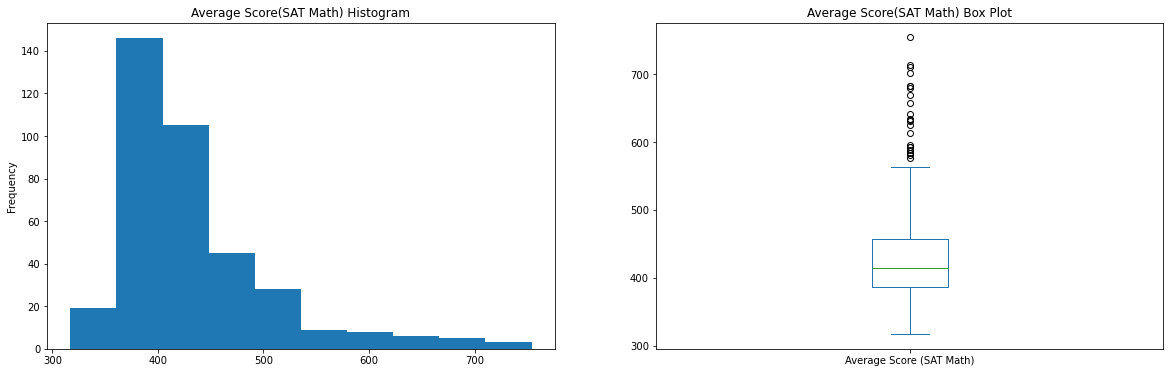

In [66]:
fig, axes = plt.subplots(1, 2)
cleaned_data["Average Score (SAT Math)"].plot(figsize = (20,6), kind = 'hist',ax=axes[0], grid = False, title = "Average Score(SAT Math) Histogram")
cleaned_data["Average Score (SAT Math)"].plot(kind = 'box',ax=axes[1], grid = False, title = "Average Score(SAT Math) Box Plot")
plt.show()
#cleaned_data.describe()

The diagram above displays the histogram for the 'Average Score (SAT Math)' which shows how the data is somewhat continuous and the average is 432.72. This shows how the average math score was close to 50% which is 400 points. The median value is 414.0 and the standard deviation is 71.92. 

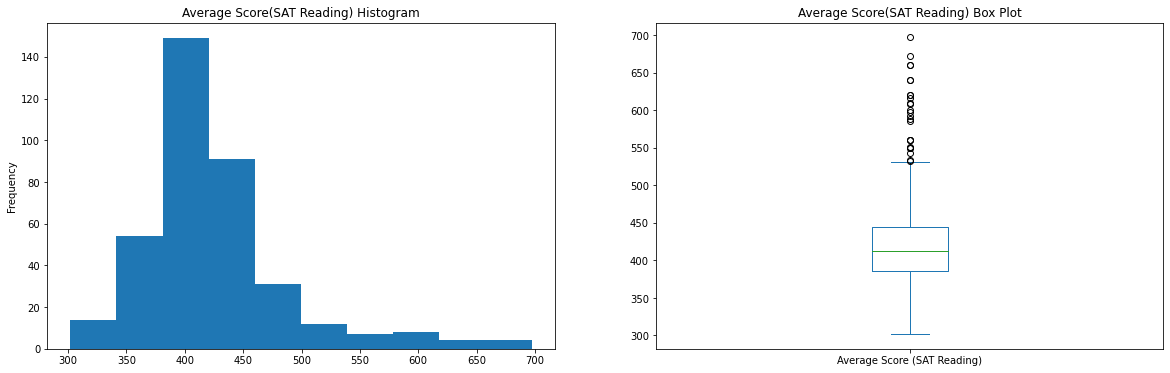

In [67]:
fig, axes = plt.subplots(1, 2)
cleaned_data["Average Score (SAT Reading)"].plot(figsize = (20,6), kind = 'hist',ax=axes[0], grid = False, title = "Average Score(SAT Reading) Histogram")
cleaned_data["Average Score (SAT Reading)"].plot(kind = 'box',ax=axes[1], grid = False, title = "Average Score(SAT Reading) Box Plot")
plt.show()
#cleaned_data.describe()

The diagram above displays the histogram for the 'Average Score (SAT Reading)' which shows how the data is somewhat continuous and the average is 424.34. This shows how the average reading score was around 50% which is 400 points. The median value is 412.5 and the standard deviation is 61.88.

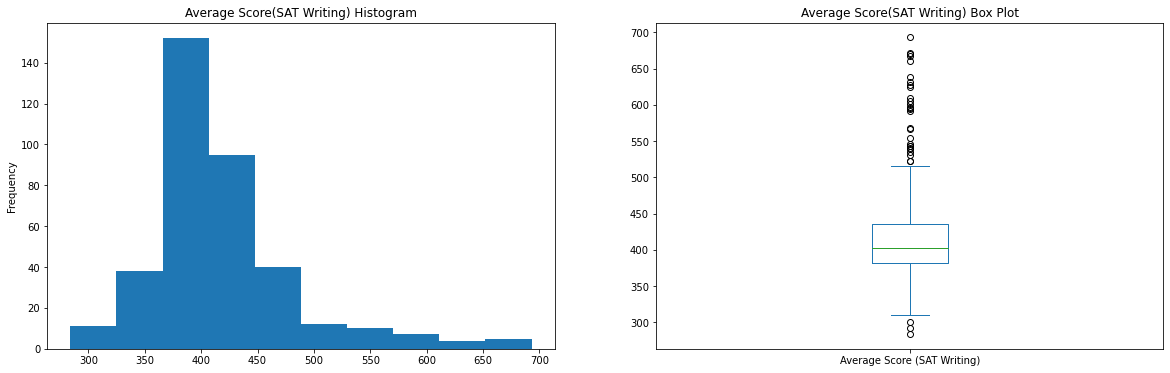

In [68]:
fig, axes = plt.subplots(1, 2)
cleaned_data["Average Score (SAT Writing)"].plot(figsize = (20,6), kind = 'hist',ax=axes[0], grid = False, title = "Average Score(SAT Writing) Histogram")
cleaned_data["Average Score (SAT Writing)"].plot(kind = 'box',ax=axes[1], grid = False, title = "Average Score(SAT Writing) Box Plot")
plt.show()
#cleaned_data.describe()

The diagram above displays the histogram for the 'Average Score (SAT Writing)' which shows how the data is somewhat continuous and the average is 418.29. This shows how the average writing score was below 50% which is 400 points. The median value is 402.5 and the standard deviation is 64.55.

The three graphs above display how the average for all three sections were close to or under 50% which was 400 per section. This shows that the average SAT scores were relatively low. The range of values displayed in the three histograms tells us that no score for any one of them was under 300 or close to 800.

The box plot on the right of each histogram displays important information such as the 25th percentile, 50th percentile, 75th percentile, mean, median, etc. This information can be used for a lot more analysis but not everything will be relivant for my project. 

This analysis will help me answer the research question further in the assignment. The data above will be compared to the different x-variables to figure out if they do in reality affect the average score.

#### x-variable 1 → Borough:

Text(0.5, 1.0, 'Histogram for Frequency vs Borough')

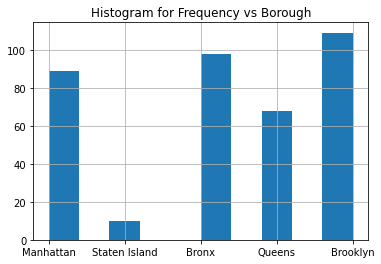

In [69]:
cleaned_data["Borough"].hist()
plt.title("Histogram for Frequency vs Borough")

The data above displays the frequency of students from each of the boroughs. We can see that the most number of people are from Brooklyn and the least are from Staten Island which could affect the results as the final answer may consist of non-sampling error(only smart student may have been picked).

This data will be compared to the average SAT Math, Writing, and Reading score to determine whether the borough you are from affect the score you receive.

#### x-variable 2 → Completion time:

<AxesSubplot:ylabel='Frequency'>

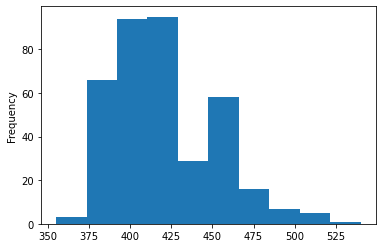

In [70]:
from datetime import datetime, timedelta
tempi = cleaned_data.reset_index()
def get_duration(row):
    start = datetime.strptime(row['Start Time'], '%I:%M %p')
    end = datetime.strptime(row['End Time'], '%I:%M %p')
    duration = (end - start).total_seconds() / 60
    return int(duration)

tempi['Duration'] = tempi.apply(get_duration, axis=1)
tempi['Duration'].plot(kind='hist')

The bi-model histogram above displays the frequency vs duration of the students who took the SAT exam that year. It tells us how the majority of individuals take between 375-425 or 450-460 minutes to complete the exam.

#### x-variable 3 → Race of the individual

<AxesSubplot:title={'center':'Race of Students'}>

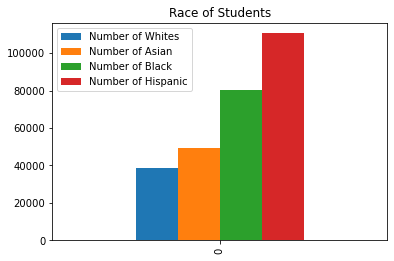

In [71]:
temp = cleaned_data.reset_index()
sco_stats = {'Number of Whites':0, 'Number of Asian':0, 'Number of Black' : 0, 'Number of Hispanic' : 0}
for index, row in temp.iterrows():
    #number  = math.ceil(float(str(row['Percent White'])[:-1]) * row['Student Enrollment']/100)
    sco_stats['Number of Whites'] += math.ceil(float(str(row['Percent White'])[:-1]) * row['Student Enrollment']/100)
    sco_stats['Number of Asian'] += math.ceil(float(str(row['Percent Asian'])[:-1]) * row['Student Enrollment']/100)
    sco_stats['Number of Black'] += math.ceil(float(str(row['Percent Black'])[:-1]) * row['Student Enrollment']/100)
    sco_stats['Number of Hispanic'] += math.ceil(float(str(row['Percent Hispanic'])[:-1]) * row['Student Enrollment']/100)
    
eth = pd.DataFrame(sco_stats,index=[0])
eth.plot(kind='bar', title="Race of Students", legend=True)

The figure is a bar plot which displays the frequency vs the race. It shows the number of White, Asian, Black, and Hispanic students taking the test. This information will be compared to the average SAT score further in the assignment to determine whether any of the races are better at any of the three sections of the SAT exam. The number of students for each race differs which could cause non-sampling error. This means the final conclusion might not be the most accurate.

### Plots, Histograms, Figures

#### Borough vs. Average SAT Scores (math, writing, reading)


##### Borough vs. Average SAT Scores (Math)


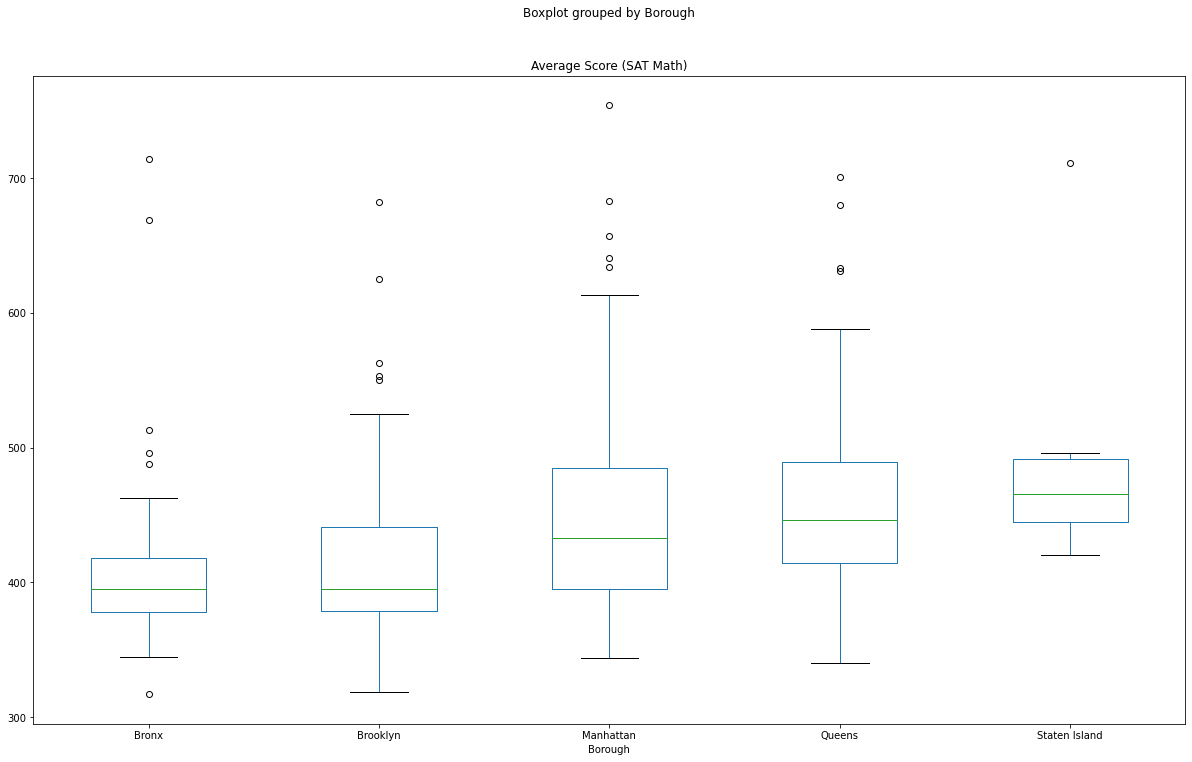

In [72]:
cleaned_data.boxplot(column = "Average Score (SAT Math)", by = "Borough", grid = False, figsize=(20,12))
plt.show()

From the data above, we can see that the Average SAT Math score is the highest for students from Staten Island and the lowest for the students from Bronx and Brooklyn. However, the highest Average Math score, from the data provided, was from Manhattan.

##### Borough vs. Average SAT Scores (Reading)

<function matplotlib.pyplot.show(close=None, block=None)>

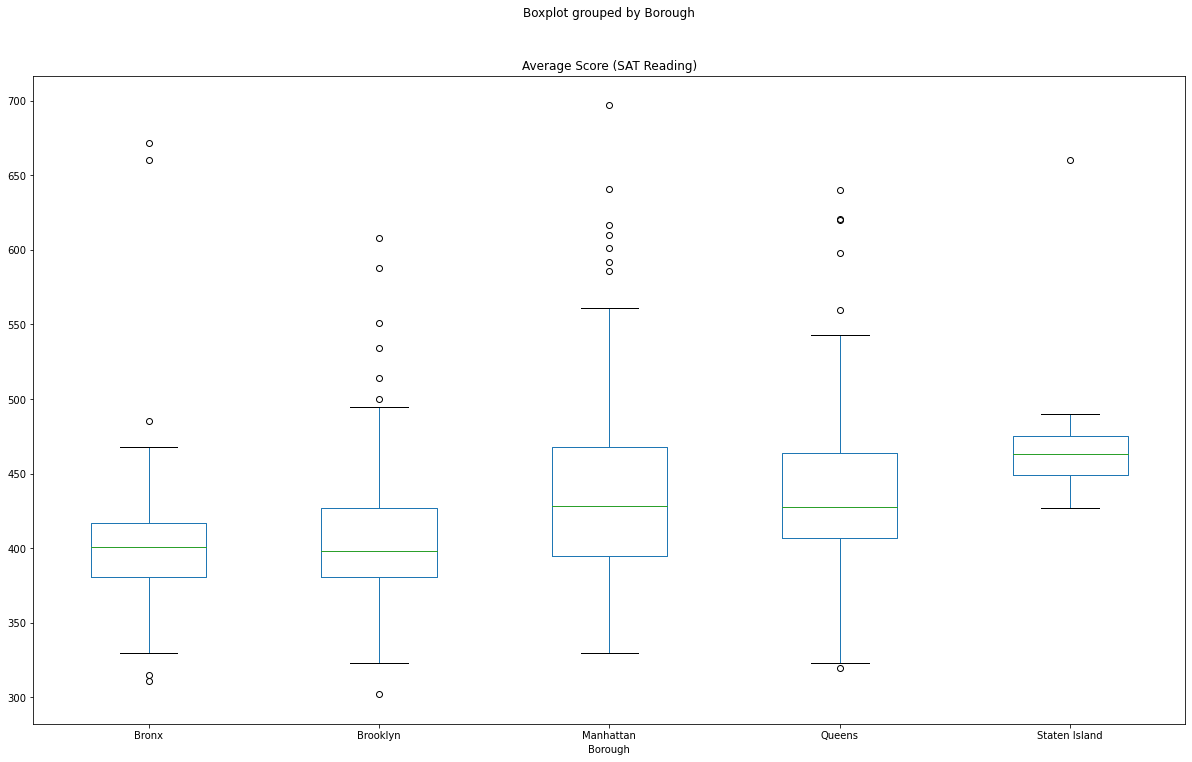

In [73]:
cleaned_data.boxplot(column = "Average Score (SAT Reading)", by = "Borough", grid = False, figsize=(20,12))
plt.show

From the data above, we can see that the Average SAT Rading score is the highest for students from Staten Island and the lowest for the students from Bronx and Brooklyn. However, the highest Average Reading score, from the data provided, was from Manhattan.

##### Borough vs. Average SAT Scores (Writing)

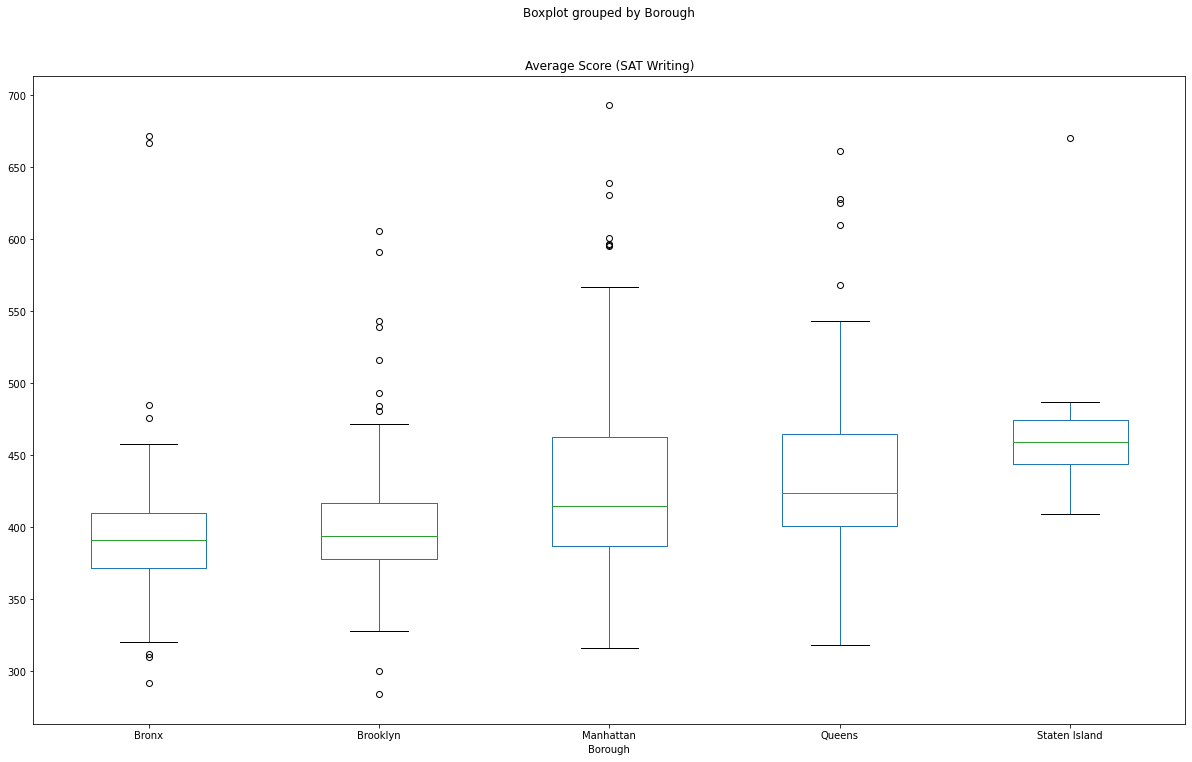

In [74]:
cleaned_data.boxplot(column = "Average Score (SAT Writing)", by = "Borough", grid = False, figsize=(20,12))
plt.show()

From the data above, we can see that the Average SAT Writing score is the highest for students from Staten Island and the lowest for the students from Bronx and Brooklyn. However, the highest Average Writing score, from the data provided, was from Manhattan.

From the three diagrams above and the histogram of the Borough vs. Student Enrolment we can come up with an answer to the question. Although Staten Island has the largest Average SAT scores for all three sections, the least amount of students are from that borough. This may be due to non-sampling error.

The data tells us that being from Staten Island may mean you do better at the test. It may be due to the fact that students from there have access to more money and could get tutors to teach them the content. Whereas, students from Bronx and Brooklyn don't have the access to such services.

#### Duration vs. Average SAT Scores (math, writing, reading)


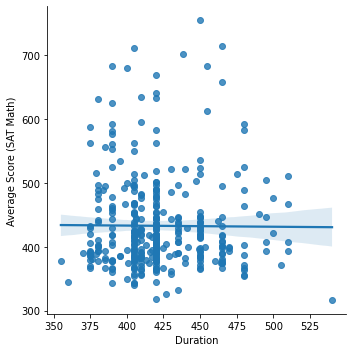

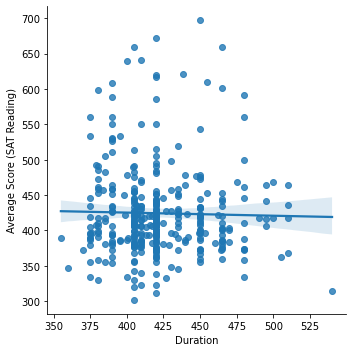

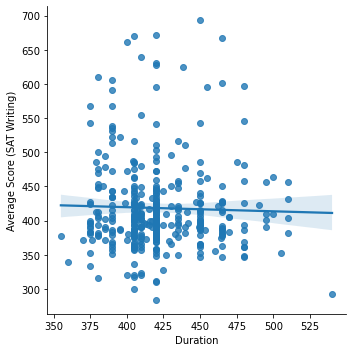

In [75]:
sb.lmplot(x='Duration', y= 'Average Score (SAT Math)',data=tempi,fit_reg=True) 
sb.lmplot(x='Duration', y= 'Average Score (SAT Reading)',data=tempi,fit_reg=True) 
sb.lmplot(x='Duration', y= 'Average Score (SAT Writing)',data=tempi,fit_reg=True) 

In [76]:
tempi.corr()

,index,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Student Enrollment,Duration
index,1.000000,-0.067046,-0.083773,-0.080671,0.142644,-0.018415
Average Score (SAT Math),-0.067046,1.000000,0.928064,0.933984,0.442820,-0.007761
Average Score (SAT Reading),-0.083773,0.928064,1.000000,0.985401,0.357366,-0.021961
Average Score (SAT Writing),-0.080671,0.933984,0.985401,1.000000,0.359122,-0.028758
Student Enrollment,0.142644,0.442820,0.357366,0.359122,1.000000,-0.001740
Duration,-0.018415,-0.007761,-0.021961,-0.028758,-0.001740,1.000000


From the scatter plots and the table displayed above, we can see that there is no correlation between the two and this cannot be one of the factors that can increase or decrease your SAT scores. This proves that the time taken to complete the test is not important. Your score depends on the preperation time and how well you understand the concepts. A student could finish the test in 400 minutes and get a 650 in each section, and one could take over 525 minutes and get a score less than 300.

#### Race of the individual vs. Average SAT Scores (math, writing, reading)


<AxesSubplot:xlabel='Number of White', ylabel='Average Score (SAT Math)'>

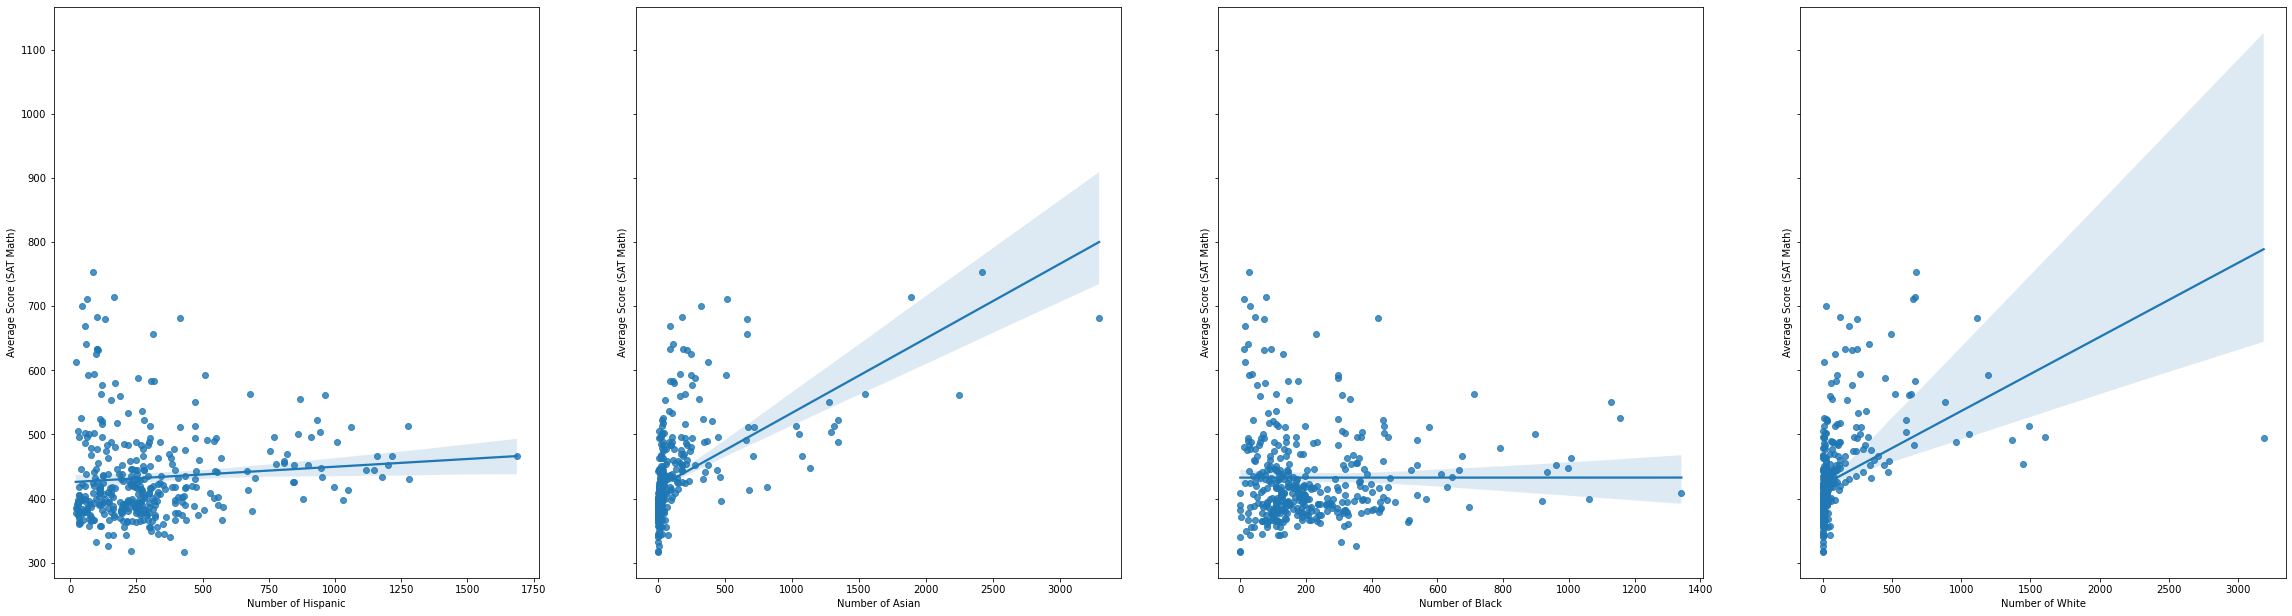

In [77]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True)
fig.set_size_inches(40, 10.5)
sb.regplot(x=tempz['Number of Hispanic'], y=tempz['Average Score (SAT Math)'], ax=ax1)
sb.regplot(x=tempz['Number of Asian'], y=tempz['Average Score (SAT Math)'], ax=ax2)
sb.regplot(x=tempz['Number of Black'], y=tempz['Average Score (SAT Math)'], ax=ax3)
sb.regplot(x=tempz['Number of White'], y=tempz['Average Score (SAT Math)'], ax=ax4)

The scatter plots above tell us that only asians

<AxesSubplot:xlabel='Number of White', ylabel='Average Score (SAT Reading)'>

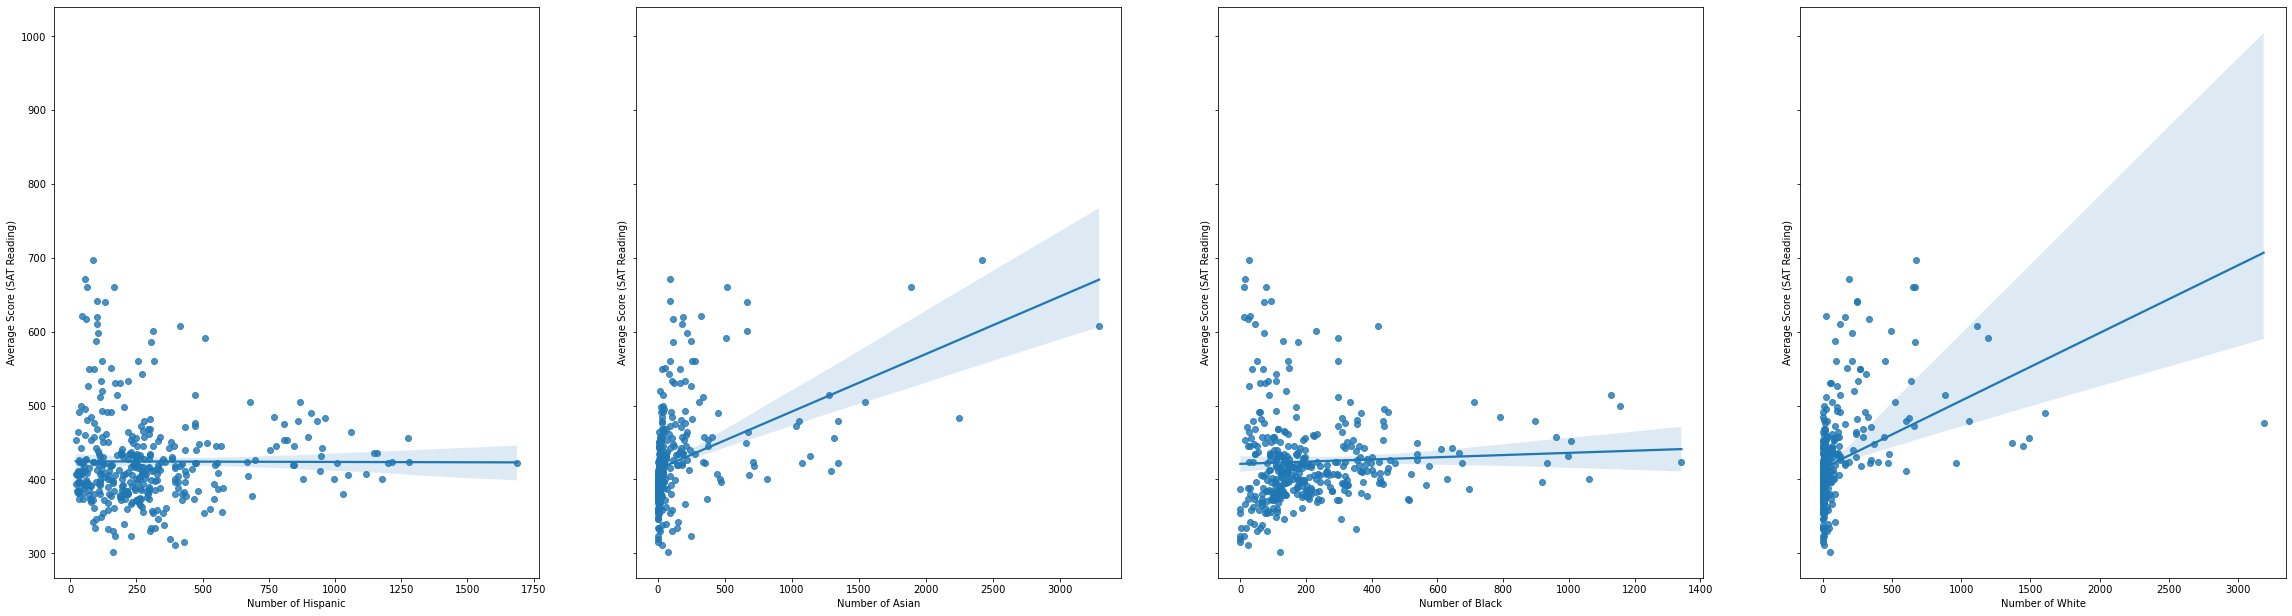

In [78]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True)
fig.set_size_inches(40, 10.5)
sb.regplot(x=tempz['Number of Hispanic'], y=tempz['Average Score (SAT Reading)'], ax=ax1)
sb.regplot(x=tempz['Number of Asian'], y=tempz['Average Score (SAT Reading)'], ax=ax2)
sb.regplot(x=tempz['Number of Black'], y=tempz['Average Score (SAT Reading)'], ax=ax3)
sb.regplot(x=tempz['Number of White'], y=tempz['Average Score (SAT Reading)'], ax=ax4)

<AxesSubplot:xlabel='Number of White', ylabel='Average Score (SAT Writing)'>

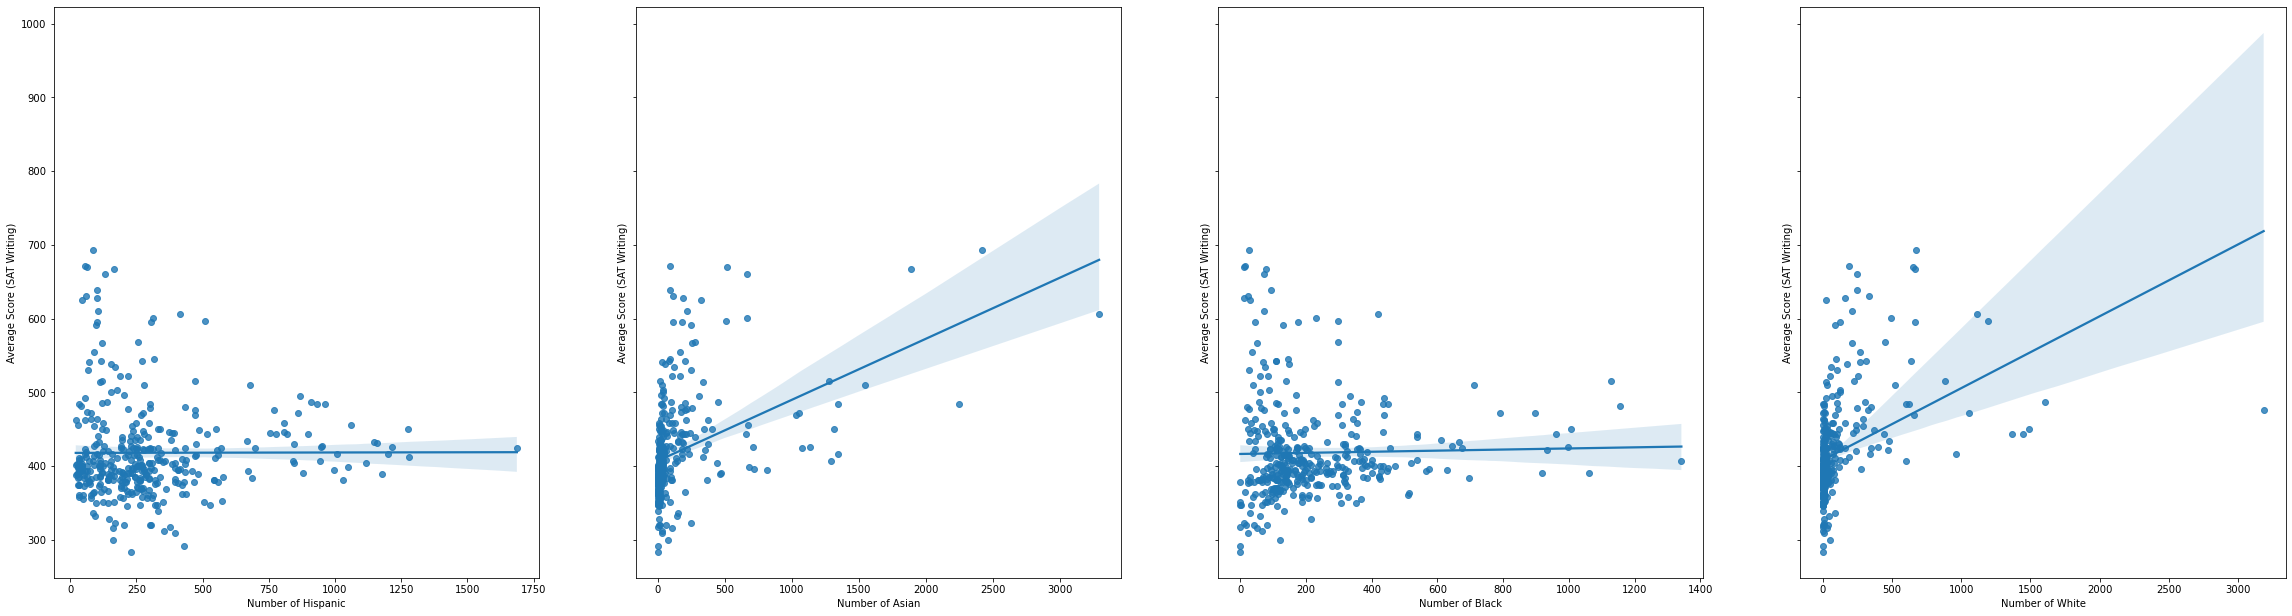

In [79]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True)
fig.set_size_inches(40, 10.5)
sb.regplot(x=tempz['Number of Hispanic'], y=tempz['Average Score (SAT Writing)'], ax=ax1)
sb.regplot(x=tempz['Number of Asian'], y=tempz['Average Score (SAT Writing)'], ax=ax2)
sb.regplot(x=tempz['Number of Black'], y=tempz['Average Score (SAT Writing)'], ax=ax3)
sb.regplot(x=tempz['Number of White'], y=tempz['Average Score (SAT Writing)'], ax=ax4)

### Conclusion

Through this project, my aim was to answer the research question: **"Are there any factors except preperation time which could explain a higher SAT score?"** The reason for doing so was to figure out if there is any factors that could give an individual an adventage on the SAT exam.



From the analysis above we can see that the borough you are from, could affect the score you get. It is not a guarantee that the score will be higher as there are students who get a lower score compared to students from other boroughs but Staten Island students may have access to more money and can get tutors to help them understand the concept better. 

The time taken to complete the exam has close to zero correlation with the average SAT score a student gets. This shows us that the two are not related and the amount of time you take to complete the exam will not increase or decrease your test score. Whether you understand the concepts or not and your preperation time have more of an affect on the score you recieve.

The third factor I tested, race vs Average SAT score shows us that there are some White and Asian students that 